**About Dataset**

**Context**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [40]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
df.shape

(5572, 5)

**Step : 01 Data Cleaning**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


I drop the last three columns because the majority of the values are nan

In [43]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [47]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
df['target']=encoder.fit_transform(df['target'])

In [49]:
df.sample(5)

,target,text
1039,0,They just talking thats it de. They wont any o...
483,0,Thank you baby! I cant wait to taste the real ...
1169,0,Msgs r not time pass.They silently say that I ...
3538,0,What happen dear. Why you silent. I am tensed
2989,0,"Love isn't a decision, it's a feeling. If we c..."


In [50]:
df.isnull().sum()

,0
target,0
text,0


In [51]:
df.duplicated().sum()

np.int64(403)

In [52]:
df.drop_duplicates(inplace=True,keep='first')

In [53]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.shape

(5169, 2)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


**Step : 02 Exploratory Data Analysis (EDA)**

In [56]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x77fe544e6310>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

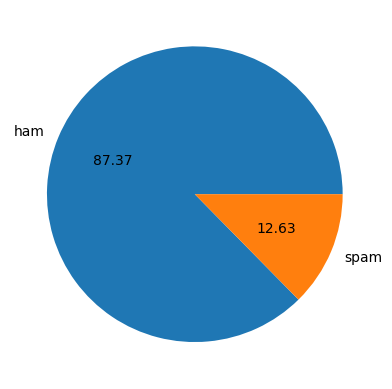

In [58]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

The data is imbalanced as there more ham about 80% as compared to spam

In [59]:
import nltk

In [60]:
!pip install nltk

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
df['num_characters']=df['text'].apply(len)

In [63]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the specific resource
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [64]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [65]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [68]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [70]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

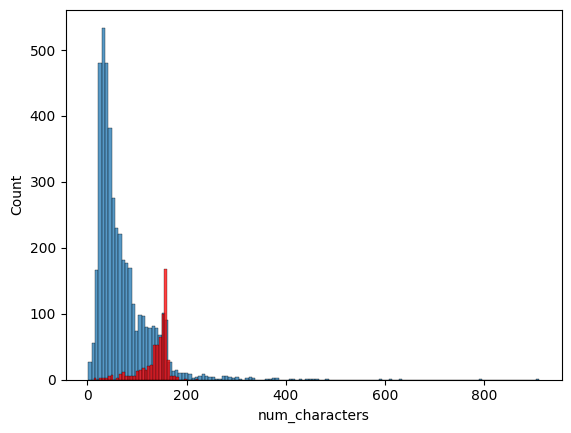

In [71]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

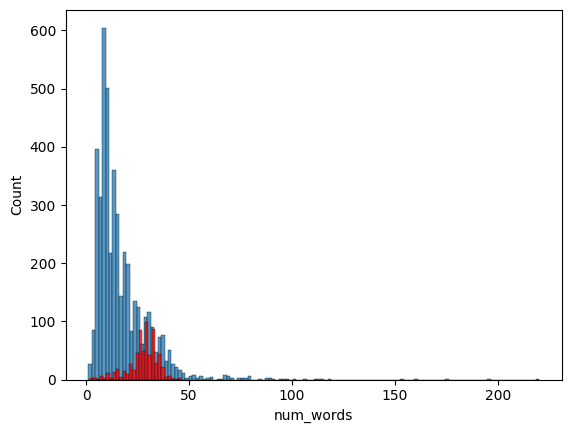

In [72]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

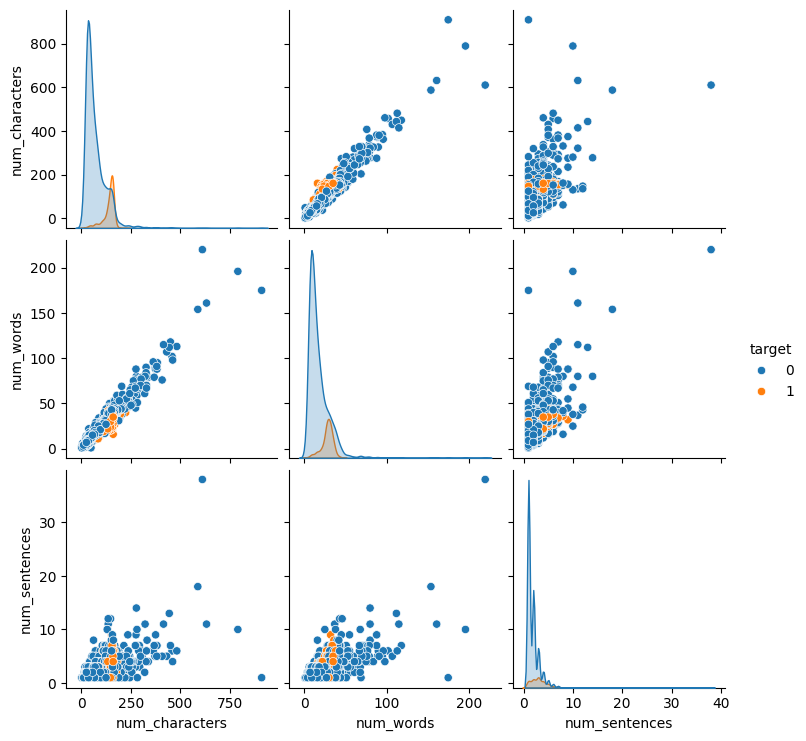

In [73]:
sns.pairplot(df,hue='target')

<Axes: >

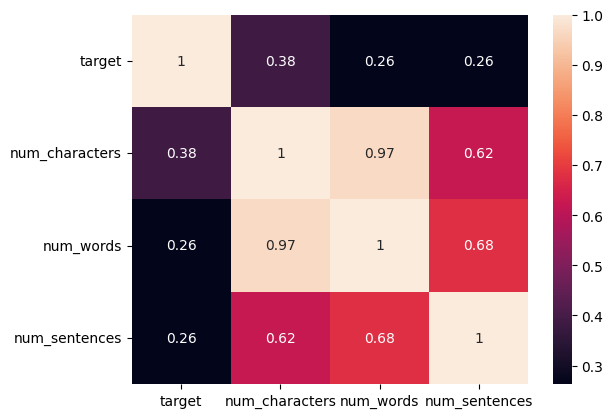

In [74]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

**Step : 03 Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming



In [77]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords', quiet=True) # Download the stopwords resource
ps=PorterStemmer()
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  word=[]
  for i in text:
    if i.isalnum():
      word.append(i)
  text=word[:]
  word.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      word.append(i)
  text=word[:]
  word.clear()
  for i in text:
       word.append(ps.stem(i))


  return " ".join(word)

In [78]:
df['Transformed_text']=df['text'].apply(transform_text)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
# create the word cloud for both the spam and ham sms
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [81]:
spam_wc=wc.generate(df[df['target']==1]['Transformed_text'].str.cat(sep=" "))

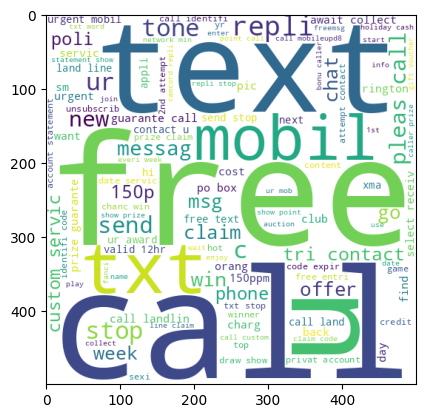

In [82]:
plt.imshow(spam_wc)

In [83]:
ham_wc=wc.generate(df[df['target']==0]['Transformed_text'].str.cat(sep=" "))

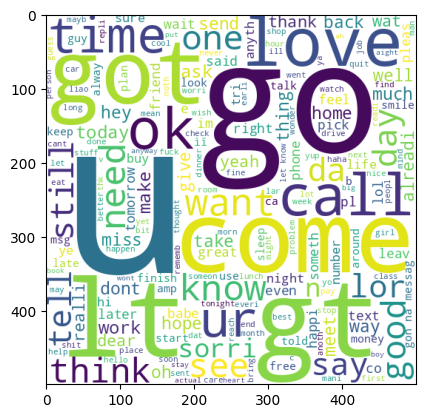

In [84]:
plt.imshow(ham_wc)

In [85]:
df.head()

,target,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
spam_words=[]
for i in df[df['target']==1]['Transformed_text'].tolist():
  for j in i.split():
    spam_words.append(j)

In [87]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

/tmp/ipython-input-94-3156849095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1],palette='muted')


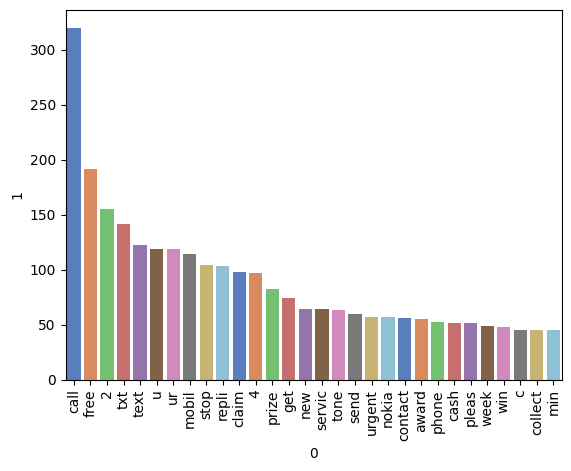

In [94]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30))
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1],palette='muted')
plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_words=[]
for i in df[df['target']==0]['Transformed_text'].tolist():
  for j in i.split():
    ham_words.append(j)

/tmp/ipython-input-97-2804412575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(30))[1],palette='muted')


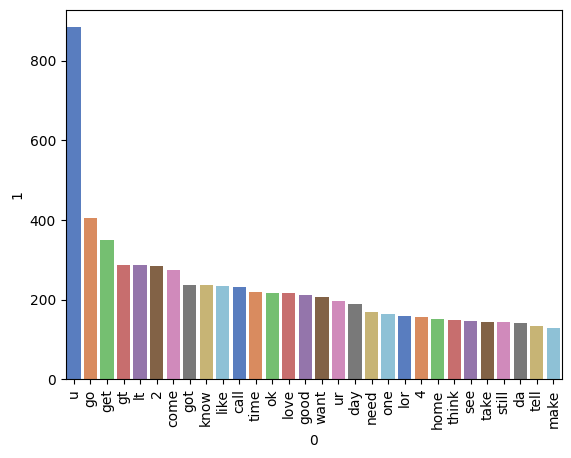

In [97]:
pd.DataFrame(Counter(ham_words).most_common(30))
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(30))[1],palette='muted')
plt.xticks(rotation='vertical')
plt.show()

**Step : 04 Model Building**

For model building our first step is to convert the text column into numbers (vectorization)

**<h4>Three common techniques for text vectorization in Natural Language Processing (NLP) are Bag of Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), and Word Embeddings (like Word2Vec).</h4>**

**1. Bag of Words (BoW):**

- BoW creates a vocabulary of all unique words in a corpus (a collection of text).
- It then represents each document as a vector, where each element indicates the frequency of a word from the vocabulary in that document.
- Essentially, it ignores word order and grammar, focusing solely on word counts.
- A simple example is representing the sentence "This is a cat. This cat is happy." as a vector. The vocabulary might be {“this”: 0, “is”: 1, “a”: 2, “cat”: 3, “happy”: 4}.

**2. Term Frequency-Inverse Document Frequency (TF-IDF):**
- TF-IDF builds upon BoW by adding a weighting scheme.
- It considers not just the frequency of a word in a document (Term Frequency or TF) but also its importance across the entire corpus (Inverse Document Frequency or IDF).
- Words that appear frequently in a document but are rare in the overall corpus get higher weights.
- This helps to highlight more relevant words and reduce the impact of common words.
- For example, the word "the" is likely to appear often in many documents, but it doesn't carry much meaning. TF-IDF would give it a lower weight compared to a specialized term in a particular document.

**3. Word Embeddings (Word2Vec, GloVe, etc.):**

- Word embeddings, like Word2Vec, are learned representations of words that capture semantic and syntactic relationships.
- Unlike BoW and TF-IDF, which treat words as discrete entities, word embeddings represent words as dense vectors in a continuous space.
- Words with similar meanings are placed closer to each other in this space.
- Word2Vec uses neural networks to learn these embeddings from large text corpora.
- This allows models to understand relationships between words (e.g., "king" is to "queen" as "man" is to "woman").

In [135]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [136]:
# x=cv.fit_transform(df['Transformed_text']).toarray()
x=tfidf.fit_transform(df['Transformed_text']).toarray()


In [137]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
y=df['target'].values

In [139]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**Naive Bayes**

Naive Bayes is a family of probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features. There are several different models within the Naive Bayes framework, each tailored to different types of data and tasks. The most common are Gaussian, Multinomial, and Bernoulli Naive Bayes.

Here's a breakdown of the main types:

**1. Gaussian Naive Bayes:**

- Assumption: Assumes that the features follow a Gaussian (normal) distribution.
- Use case: Best suited for continuous data where feature values are assumed to be drawn from a normal distribution.
- Example: Often used in scenarios where the data has a bell-shaped curve, like height, weight, or temperature measurements.

**2. Multinomial Naive Bayes:**

- Assumption:
Deals with discrete features, typically representing counts or frequencies of events.
- Use case:
Widely used in text classification (spam detection, sentiment analysis) where features represent word counts or term frequencies.
- Example:
Classifying documents into categories based on the frequency of words present in them.

3. Bernoulli Naive Bayes:
Assumption:
Also deals with discrete features, but the features are binary (0 or 1), indicating presence or absence of a feature.
Use case:
Suitable for tasks where you only care about whether a feature is present or not, rather than its frequency.
Example:
Classifying emails as spam or not spam based on whether certain keywords are present.

In [141]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [142]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_text)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [143]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_text)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [144]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_text)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [147]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [149]:
train_classifier(svc,x_train,y_train,x_text,y_test)

(0.9758220502901354, 0.9747899159663865)

In [150]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_text,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [151]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [152]:
performance_df.head()

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576


**Step : 05 Model Improvement**

In [153]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [154]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [156]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [159]:
y_pred = voting.predict(x_text)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [160]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [161]:
from sklearn.ensemble import StackingClassifier

In [162]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [163]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_text)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [164]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))